In [1]:
# from IPython.core.interactiveshell import InteractiveShell
from sympy.logic.boolalg import And
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import sympy as sp
import sympy.physics.mechanics as me

np.set_printoptions(precision=2, suppress=True)
%precision 2

# InteractiveShell.ast_node_interactivity = "all"

me.init_vprinting()

t = sp.symbols('theta') # radian
def Full8thOrder(h, beta):
    beta = beta * sp.pi / 180
    return h * (6.09755*(t/beta)**3 - 20.78040*(t/beta)**5 + 26.73155*(t/beta)**6 -\
          13.60965*(t/beta)**7 + 2.56095*(t/beta)**8)

def FullCycloidal(h, beta):
    beta = beta * sp.pi / 180
    return h * (t/beta - 1/2/sp.pi*sp.sin(2*sp.pi*t/beta))

def FullDoubleHarmonic(h, beta):
    beta = beta * sp.pi / 180
    return h/2* ((1-sp.cos(sp.pi*t/beta)) - (1-sp.cos(2*sp.pi*t/beta))/4)

def FullModifiedTrapezoidal(h, beta):
    beta = beta * sp.pi / 180
    return sp.Piecewise(
        (h * (.38898448*t/beta - .0309544*sp.sin(4*sp.pi*t/beta)), 
         And(0<=t, t<beta/8)),
        (h * (2.44406184*(t/beta)**2 - .22203097*t/beta + .00723407), 
         And(beta/8<=t, t<3*beta/8)),
        (h * (1.6110154*t/beta - .0309544*sp.sin(4*sp.pi*t/beta-sp.pi) - .3055077),
         And(3*beta/8<=t, t<5*beta/8)), 
        (h * (-2.44406184*(t/beta)**2 + 4.6660917*t/beta - 1.2292648),
         And(5*beta/8<=t, t<7*beta/8)), 
        (h * (.6110154 + .38898448*t/beta + .0309544*sp.sin(4*sp.pi*t/beta - 3*sp.pi)),
         And(7*beta/8<=t, t<=beta))
    )
    
def FullSimpleHarmonic(h, beta):
    beta = beta * sp.pi / 180
    return h/2 * (1 - sp.cos(sp.pi*t/beta))

def FullModifiedSinusoidal(h, beta):
    beta = beta * sp.pi / 180
    return sp.Piecewise(
        (h * (.43990085*t/beta - .0350062*sp.sin(4*sp.pi*t/beta)), 
        And(0<=t, t<beta/8)),
        (h * (.28004957 + .43990085*t/beta - .31505577*sp.cos(4*sp.pi/3*t/beta-sp.pi/6)), 
        And(beta/8<=t, t<7*beta/8)),
        (h * (.56009915 + .43990085*t/beta - .0350062*sp.sin(4*sp.pi*t/beta-2*sp.pi)), 
        And(7*beta/8<=t, t<=beta))
    )
    
def HalfSimpleHarmonic1(h, beta):
    beta = beta * sp.pi / 180
    return h * (1 - sp.cos(sp.pi*t/2/beta))
    
def HalfSimpleHarmonic2(h, beta):
    beta = beta * sp.pi / 180
    return h * sp.sin(sp.pi*t/2/beta)
    
def HalfCycloidal1(h, beta):
    beta = beta * sp.pi / 180
    return h * (t/beta + 1/sp.pi*sp.sin(sp.pi*t/beta))
    
def HalfCycloidal2(h, beta):
    beta = beta * sp.pi / 180
    return h * (t/beta - 1/sp.pi*sp.sin(sp.pi*t/beta))

ang = 6
b1, b2, b3, b4 = 55, 5, 55, 245
num, n = 1000, 500
omg = n*np.pi/30
h = float(2*sp.cos(ang*sp.pi/180))

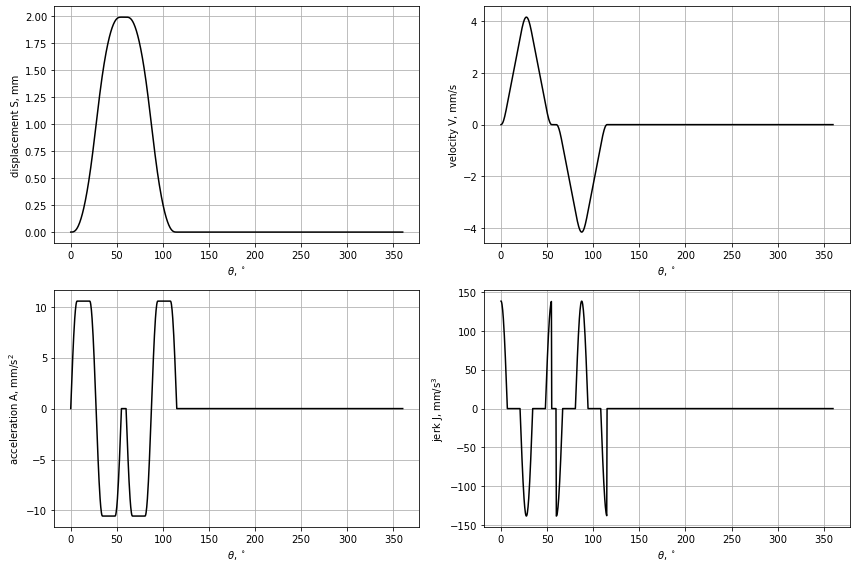

In [2]:
s1 = FullModifiedTrapezoidal(h,b1)
s2 = s2n = np.ones(int(num*b2/360))*h
# s3 = h * (1 - t/b3r + 1/2/sp.pi*sp.sin(2*sp.pi*t/b3r))
s3 = -FullModifiedTrapezoidal(h,b3) + h
s4 = s4n = np.zeros(int(num*b4/360))
s1n = sp.lambdify(t,s1)
s3n = sp.lambdify(t,s3)

t1 = np.linspace(0,b1,int(num*b1/360),endpoint=0)
t2 = np.linspace(0,b2,int(num*b2/360),endpoint=0)
t3 = np.linspace(0,b3,int(num*b3/360),endpoint=0)
t4 = np.linspace(0,b4,int(num*b4/360))
xs = np.hstack([t1,b1+t2,b1+b2+t3,b1+b2+b3+t4])
ys = np.hstack([s1n(t1*np.pi/180),s2n,s3n(t3*np.pi/180),s4n])

ds1 = s1.diff()
ds2 = ds2n = np.zeros(int(num*b2/360))
ds3 = s3.diff()
ds1n = sp.lambdify(t, ds1)
ds3n = sp.lambdify(t, ds3)
dys = np.hstack([ds1n(t1*np.pi/180),ds2n,ds3n(t3*np.pi/180),s4n])

dds1 = ds1.diff()
dds3 = ds3.diff()
dds1n = sp.lambdify(t, dds1)
dds3n = sp.lambdify(t, dds3)
ddys = np.hstack([dds1n(t1*np.pi/180),ds2n,dds3n(t3*np.pi/180),s4n])

ddds1 = dds1.diff()
ddds3 = dds3.diff()
ddds1n = sp.lambdify(t, ddds1)
ddds3n = sp.lambdify(t, ddds3)
dddys = np.hstack([ddds1n(t1*np.pi/180),ds2n,ddds3n(t3*np.pi/180),s4n])

fig, ax = plt.subplots(2,2,figsize=(12,8))
ax[0][0].plot(xs,ys,label='S',c='k')
ax[0][0].set_xlabel(r'$\theta$, $^\circ$')
ax[0][0].set_ylabel(r'displacement S, mm')
ax[0][0].grid()

ax[0][1].plot(xs,dys,label='V',c='k')
ax[0][1].set_xlabel(r'$\theta$, $^\circ$')
ax[0][1].set_ylabel(r'velocity V, mm/s')
ax[0][1].grid()

ax[1][0].plot(xs,ddys,label='A',c='k')
ax[1][0].set_xlabel(r'$\theta$, $^\circ$')
ax[1][0].set_ylabel(r'acceleration A, mm/s$^2$')
ax[1][0].grid()

ax[1][1].plot(xs,dddys,label='J',c='k')
ax[1][1].set_xlabel(r'$\theta$, $^\circ$')
ax[1][1].set_ylabel(r'jerk J, mm/s$^3$')
ax[1][1].grid()

plt.tight_layout()
# plt.savefig('SVAJ2.png',dpi=600)

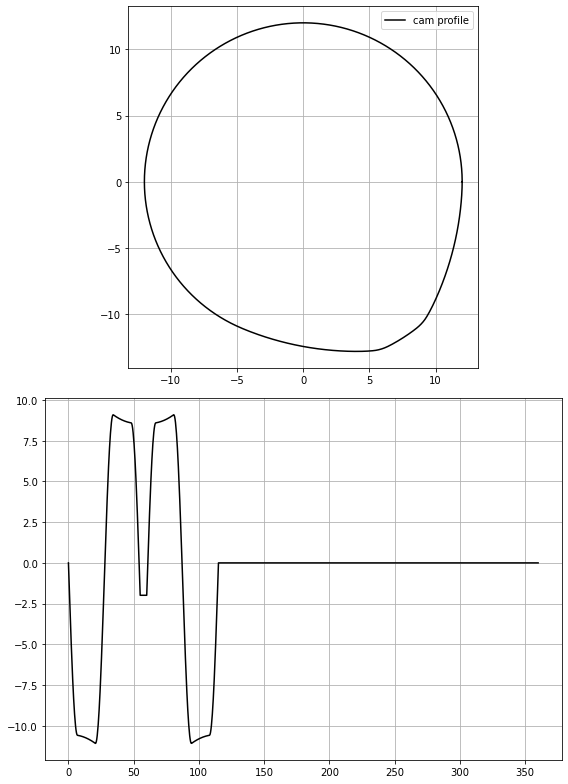

In [8]:
Rb, s, x, theta = 12, ys, dys, xs*np.pi/180
RA = np.sqrt((Rb+s)**2 + x**2)
sigA = theta + np.arctan(x/(Rb + s))

xn = RA * np.cos(sigA)
yn = -np.sign(omg) * RA * np.sin(sigA)

# % axis equal
# % plot(s,(R0+Y));
# rho = Rb + ys + ddys
# xn = rho*np.cos(T)
# yn = rho*np.sin(T)

fig, ax = plt.subplots(2,1, figsize=(8,11))
# fig0.show()
ax[0].plot(xn,yn,'k',label='cam profile')
ax[0].grid()
ax[0].set_aspect('equal')
ax[0].legend()
# ax[0].set_xlim(0,30)
# ax[0].set_ylim(-30,-20)
ax[1].plot(xs,-ys-ddys,'k')
ax[1].grid()
ax[1].set_xlabel
plt.tight_layout()
minx = np.min(np.where(xs<1e-2))
xxs, yxs = xn[:minx],yn[:minx]
# np.savetxt('cam_profile.txt',np.array([xxs,yxs,np.zeros(len(xxs))]).reshape(len(xxs),3),delimiter='\t')
np.savetxt('cam_profile.txt',np.array([xn,yn,np.zeros(len(xn))]).T,delimiter='\t')

[ 12.    12.    12.    12.    12.    11.99  11.99  11.98  11.98  11.97
  11.97  11.96  11.95  11.94  11.93  11.91  11.9   11.88  11.87  11.85
  11.83  11.82  11.8   11.78  11.76  11.73  11.71  11.69  11.66  11.64
  11.61  11.58  11.55  11.53  11.49  11.46  11.43  11.4   11.37  11.33
  11.3   11.26  11.22  11.18  11.14  11.1   11.06  11.02  10.98  10.94
  10.89  10.85  10.8   10.75  10.7   10.65  10.6   10.55  10.5   10.45
  10.4   10.34  10.29  10.23  10.18  10.13  10.08  10.02   9.97   9.92
   9.87   9.83   9.78   9.74   9.69   9.65   9.61   9.58   9.54   9.51
   9.48   9.45   9.42   9.4    9.38   9.36   9.34   9.32   9.3    9.29
   9.28   9.26   9.25   9.24   9.23   9.22   9.21   9.2    9.19   9.18
   9.17   9.16   9.15   9.13   9.12   9.11   9.1    9.09   9.07   9.06
   9.05   9.03   9.02   9.01   9.     8.98   8.97   8.95   8.94   8.93
   8.91   8.9    8.88   8.87   8.85   8.84   8.82   8.81   8.79   8.78
   8.76   8.75   8.73   8.71   8.7    8.68   8.66   8.65   8.63   8.6
   8.58

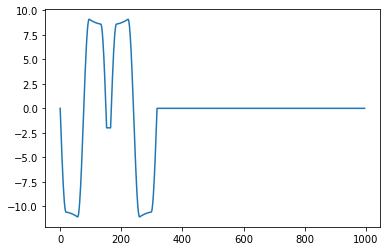

In [6]:
rho_min = 1.5
Rb = rho_min - min(ys + ddys)
plt.plot(-ys-ddys)
# print(np.where(-ys-ddys==min(-ys-ddys)))
# 260/1000*360
print(xn,yn)
# pn = sp.lambdify(t,p)
# plt.plot(np.linspace(0,100), pn(np.linspace(0,100)))